# Analyzing Spotify Dataset

This is an Exploratory Data Analysis (EDA) of the spotify dataset to find out hidden insights from the data.
The main aim of this project is to gain more practise and have good command on EDA.

I will apply a step by step approach to get accustomed to all the steps that are there is the process of EDA

## About the dataset

Content
The "Spotify_data.csv" file contains more than 160,000 (169,909) songs collected from Spotify Web API, and also you can find data grouped by artist, year, or genre in the data section.

Primary:
- id (Id of track generated by Spotify)
Numerical:
- acousticness (Ranges from 0 to 1)
- danceability (Ranges from 0 to 1)
- energy (Ranges from 0 to 1)
- duration_ms (Integer typically ranging from 200k to 300k)
- instrumentalness (Ranges from 0 to 1)
- valence (Ranges from 0 to 1) (Describes the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)).
- popularity (Ranges from 0 to 100)
- tempo (Float typically ranging from 50 to 150)
- liveness (Ranges from 0 to 1)
- loudness (Float typically ranging from -60 to 0)
- speechiness (Ranges from 0 to 1)
- year (Ranges from 1921 to 2020)
Dummy:
- mode (0 = Minor, 1 = Major)
- explicit (0 = No explicit content, 1 = Explicit content)
Categorical:
- key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)
- artists (List of artists mentioned)
- release_date (Date of release mostly in yyyy-mm-dd format, however precision of date may vary)
- name (Name of the song)

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
df = pd.read_csv("Spotify_data.csv")

In [3]:
print(df.shape)
df.columns

(169909, 19)


Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year'],
      dtype='object')

In [4]:
df.isna().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

In [5]:
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [6]:
df.drop(['id','explicit','key','release_date','mode'], axis=1, inplace=True
)
df.head()

,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,name,popularity,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0.563,0.1510,-12.428,Singende Bataillone 1. Teil,0,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0.901,0.0763,-28.454,"Fantasiestücke, Op. 111: Più tosto lento",0,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0.000,0.1190,-19.924,Chapter 1.18 - Zamek kaniowski,0,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0.887,0.1110,-14.734,Bebamos Juntos - Instrumental (Remasterizado),0,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0.908,0.0980,-16.829,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,0.0424,62.149,0.0693,1928


In [7]:
unique_artists = len(df['artists'].unique())
print("Total number of unique artists:" , unique_artists)

Total number of unique artists: 33375


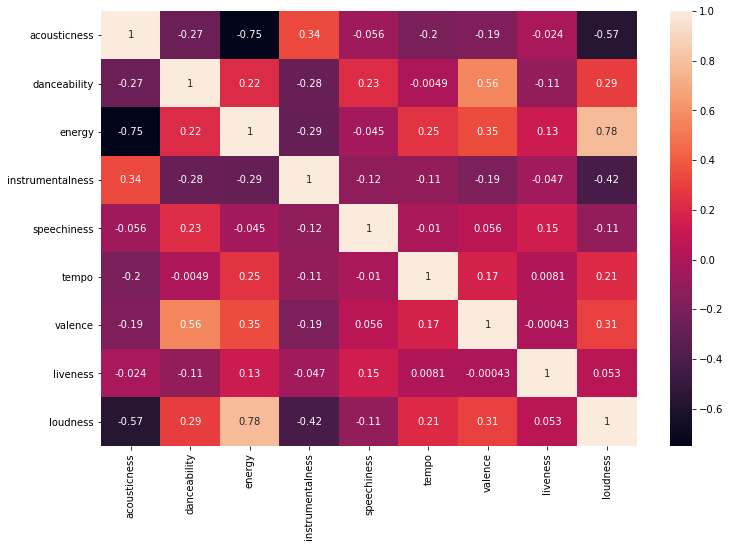

In [8]:
corr = df[['acousticness','danceability', 'energy', 'instrumentalness', 'speechiness',
   'tempo', 'valence', 'liveness', 'loudness']].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True)

In [9]:
df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence,year
count,169909.000000,169909.000000,1.699090e+05,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000
mean,0.493214,0.538150,2.314062e+05,0.488593,0.161937,0.206690,-11.370289,31.556610,0.094058,116.948017,0.532095,1977.223231
std,0.376627,0.175346,1.213219e+05,0.267390,0.309329,0.176796,5.666765,21.582614,0.149937,30.726937,0.262408,25.593168
min,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,1921.000000
25%,0.094500,0.417000,1.710400e+05,0.263000,0.000000,0.098400,-14.470000,12.000000,0.034900,93.516000,0.322000,1957.000000
50%,0.492000,0.548000,2.086000e+05,0.481000,0.000204,0.135000,-10.474000,33.000000,0.045000,114.778000,0.544000,1978.000000
75%,0.888000,0.667000,2.629600e+05,0.710000,0.086800,0.263000,-7.118000,48.000000,0.075400,135.712000,0.749000,1999.000000
max,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,3.855000,100.000000,0.969000,244.091000,1.000000,2020.000000


(0.0, 600000.0)

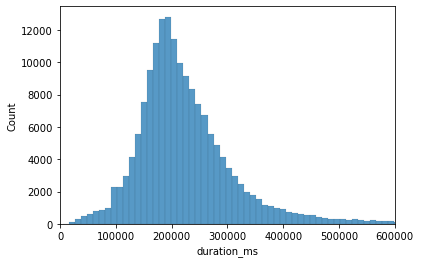

In [10]:
ax = sns.histplot(df['duration_ms'], bins =500)
plt.xlim(0, 600000)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 <a list of 100 Text major ticklabel objects>)

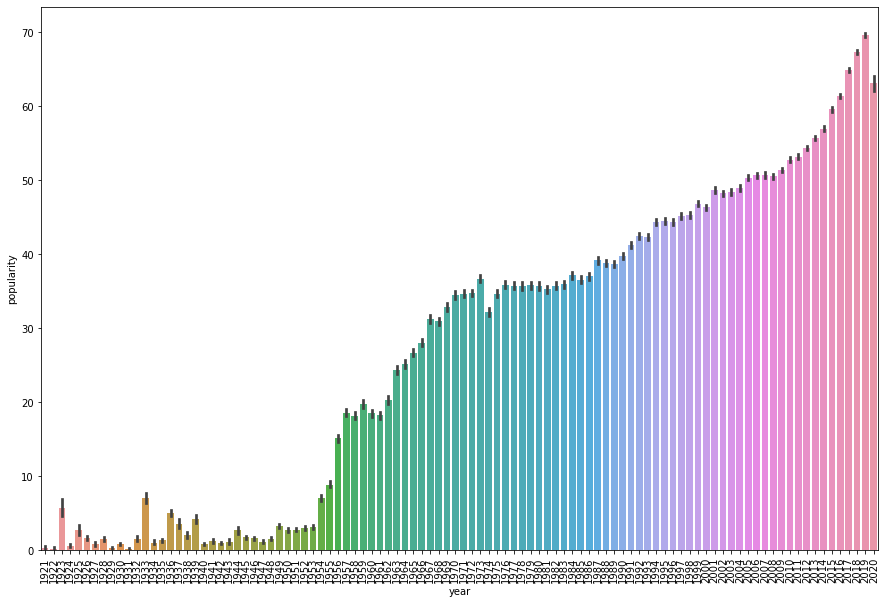

In [11]:
plt.figure(figsize = (15,10))
g = sns.barplot(x = 'year', y = 'popularity', data = df)
plt.xticks(rotation=90)

In [12]:
year_avg = df[['danceability','energy',
               'liveness','loudness', 
               'acousticness', 'valence','year']].groupby('year').mean().sort_values(by='year').reset_index()
year_avg.head()

,year,danceability,energy,liveness,loudness,acousticness,valence
0,1921,0.425661,0.236784,0.215814,-17.095438,0.895823,0.425495
1,1922,0.480000,0.237026,0.238647,-19.179958,0.939236,0.534056
2,1923,0.568462,0.246936,0.236656,-14.373882,0.976329,0.624788
3,1924,0.548654,0.347033,0.237875,-14.202304,0.935575,0.668574
4,1925,0.571890,0.264373,0.243094,-14.516707,0.965422,0.616430


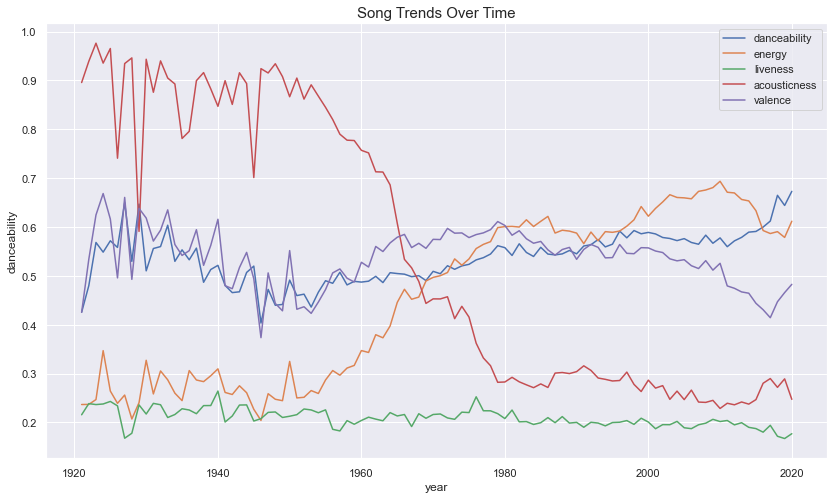

In [13]:
plt.figure(figsize=(14,8))
sns.set(style='darkgrid')
plt.title("Song Trends Over Time", fontsize=15)
lines = ['danceability','energy','liveness','acousticness','valence'] ## cannot include loudness due to scale difference
for line in lines:
    ax = sns.lineplot(x='year', y=line, data=year_avg)
plt.legend(lines)

In [14]:
df.artists.nunique()

33375

In [15]:
df.artists.value_counts().to_frame()[:10]

,artists
['Эрнест Хемингуэй'],1215
['Francisco Canaro'],938
['Эрих Мария Ремарк'],781
['Ignacio Corsini'],620
['Frank Sinatra'],592
['Bob Dylan'],539
['The Rolling Stones'],512
['Johnny Cash'],502
['The Beach Boys'],491
['Elvis Presley'],488


In [16]:
most_song_artists = df.artists.value_counts().to_frame().index[:10]

In [17]:
df_artists = df[df.artists.isin(most_song_artists)][['artists','year',
                                                        'energy']].groupby(['artists','year']).count().reset_index()
df_artists.rename(columns={'energy':'song_count'}, inplace=True)

df_artists.head()

,artists,year,song_count
0,['Bob Dylan'],1962,13
1,['Bob Dylan'],1963,73
2,['Bob Dylan'],1964,21
3,['Bob Dylan'],1965,66
4,['Bob Dylan'],1966,72
